# # LestGrowMoreVIP - Data Science Internship        
Beginner Level Task_2 :- Stock Market Prediction And Forecasting Using Stacked LSTM                  

Project By - Vaishnavi Uday Nehe 

# Import Required Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Data Processing

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [45]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [46]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [47]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [48]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [49]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date   Open   High    Low   Last  Close  Total Trade Quantity  \
0     False  False  False  False  False  False                 False   
1     False  False  False  False  False  False                 False   
2     False  False  False  False  False  False                 False   
3     False  False  False  False  False  False                 False   
4     False  False  False  False  False  False                 False   
...     ...    ...    ...    ...    ...    ...                   ...   
2030  False  False  False  False  False  False                 False   
2031  False  False  False  False  False  False                 False   
2032  False  False  False  False  False  False                 False   
2033  False  False  False  False  False  False                 False   
2034  False  False  False  False  False  False                 False   

      Turnover (Lacs)  
0               False  
1               False  
2

Sorting data according to date

In [50]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by = 'Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Sorting index

In [51]:
df.reset_index(inplace = True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Graph Plotting Of Stocks At Close

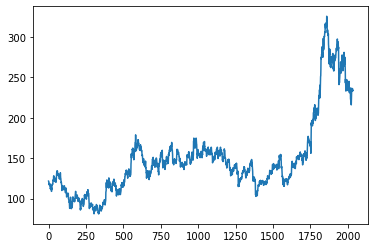

In [52]:
plt.plot(df['Close'])

In [53]:
df1 = df['Close']

# Feature Scaling

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Split data into training and testing 

In [55]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [56]:
training_size, test_size

(1424, 611)

Convert array values into matrix

In [57]:
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [58]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [59]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

#Reshape input which is required for LSTM


In [60]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [65]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 31s 726ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 2/60
19/19 [==============================] - 7s 382ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 8s 437ms/step - loss: 9.5447e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 9s 443ms/step - loss: 8.6087e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 9s 496ms/step - loss: 8.7398e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 9s 490ms/step - loss: 8.4413e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 8s 395ms/step - loss: 8.0808e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 6s 334ms/step - loss: 7.3770e-04 - val_loss: 9.7696e-04
Epoch 9/60
19/19 [==============================] - 7s 349ms/step - loss: 7.1830e-04 - val_loss: 8.9299e-04
Epoch 10/60
19/19 [==============================] - 7s 370ms/s